# Example of Continuous random variable

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [4]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 8.1 Normal distribution
- = Gaussian distribution
- ⭐️ 변환한 확률 분포도 정규분포를 따른다 aX+ b ~ N(a * mean + b, a ** 2 * (std) ** 2 )
- Standard normal distribtionn : N ( 0, 1 )

In [5]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [6]:
mu, sigma  = 2, 0.5
X = N(mu, sigma)

In [7]:
check_prob(X)

expected vaue 2.000
variance 0.250


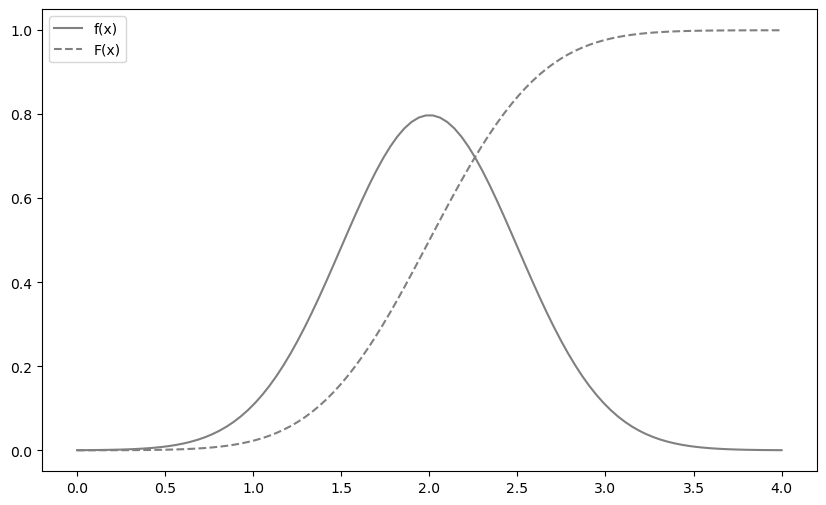

In [8]:
plot_prob(X, 0, 4) # range 0 to 4

In [9]:
rv = stats.norm(2, 0.5)
rv.mean(), rv.var()

(2.000, 0.250)

In [10]:
rv.pdf(2) # [P(X= 2) 확률을 구하는 것이 아니다 = density at 2, should be integrated  

0.798

In [11]:
rv.cdf(1.7)

0.274

In [12]:
# isf = upper 100a% point 
rv.isf(0.3)

2.262

In [13]:
rv.interval(0.9) # 이게 뭘 의미하는거지?

(1.178, 2.822)

In [14]:
rv.isf(0.95), rv.isf(0.05)

(1.178, 2.822)

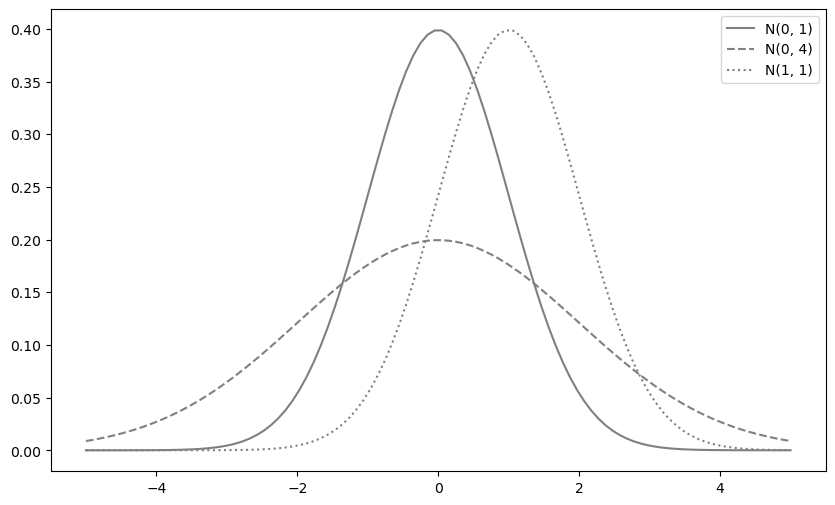

In [15]:
# sigma = wide distribution & mu = 평행이동
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

실제 해석 예시
- 데이터 1,000개 모아서 평균 = 170, 표준편차 = 6 → 키 분포를 정규분포로 근사.
- “평균 ± 1σ 안에 약 68%”, “± 2σ 안에 약 95%”, “± 3σ 안에 99.7%” → 해석 가능.
- 이를 활용해 이상치 탐지나 특정 구간의 확률 추정을 할 수 있음.

## 8.2 Exponential distribution
- 어떤 사건이 발생하는 간격이 따르는 분포
- eg. 하루당 평균 2건의 교통사고가 발생하는 지역에서 하루 교통사고 발생 간격
- eg. 1시간당 평균 10번 엑세스 하는 사이트에 대한 액세스 간격
- 지수분포는 포아송 분포와 관련성이 강한 확률분포 
    - 단위 시간당 발생하는 횟수를 따르는 것이 포아송
    - 사건 발생 간격이 따르는 것이 지수분포

👉 예시:

콜센터에 1시간 동안 전화가 몇 번 오는지
웹 서버에 1분 동안 요청이 몇 번 들어오는지

####
콜센터에 전화를 다음에 받을 때까지 걸리는 시간
서버에 다음 요청이 들어오기까지 걸리는 시간

In [16]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [17]:
lam = 3
X = Ex(lam)

In [18]:
check_prob(X)

expected vaue 0.333
variance 0.111


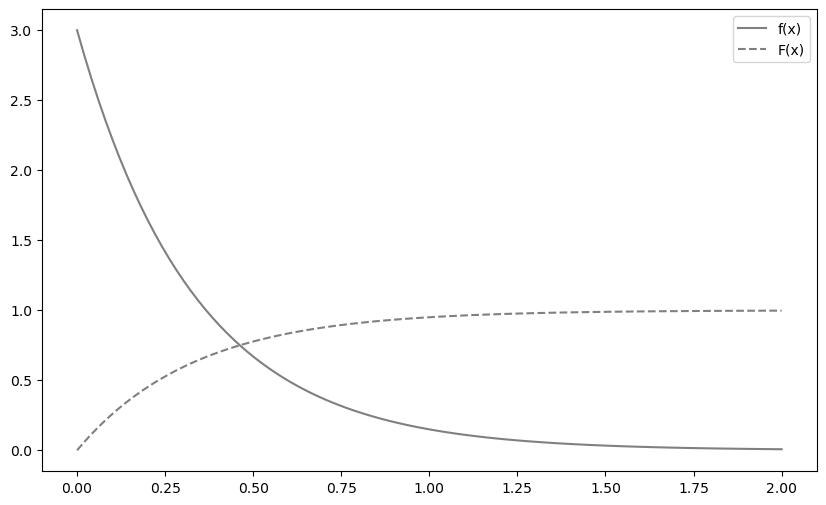

In [19]:
plot_prob(X, 0, 2)

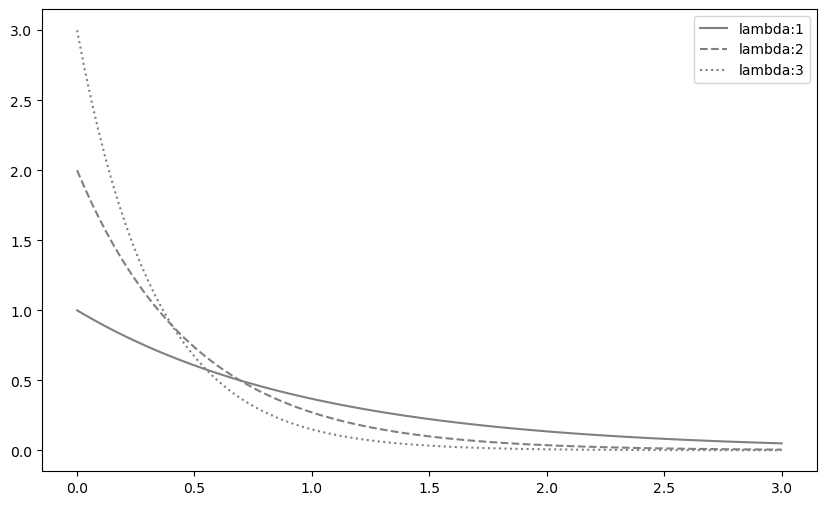

In [20]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 8.3 Chi-square distribution
- 분산의 구간 추정이나 독립성 검정에 사용되는 확률 분포
- 서로 독립인 복수의 표준정규분포에 의해 정의 됨
####
- 자유도가 n인 카이제곱 분포 X ** 2(n) 으로 표기합니다. 

In [21]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# Random sampling 10 * 100 size form starndard normal distribution
Zs_sample = rv.rvs(((n, sample_size)))

chi2_sample = np.sum(Zs_sample**2, axis = 0)

- 10개의 표준 정규분포 제곱합이므로, 자유도가 10인 카이제곱분포가 된다

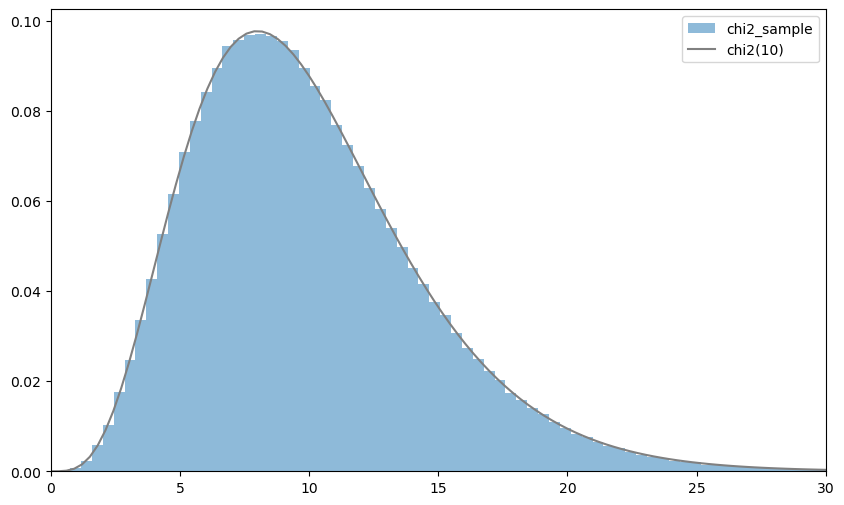

In [22]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv_true = stats.chi2(n) # 10 degree of freedom 
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

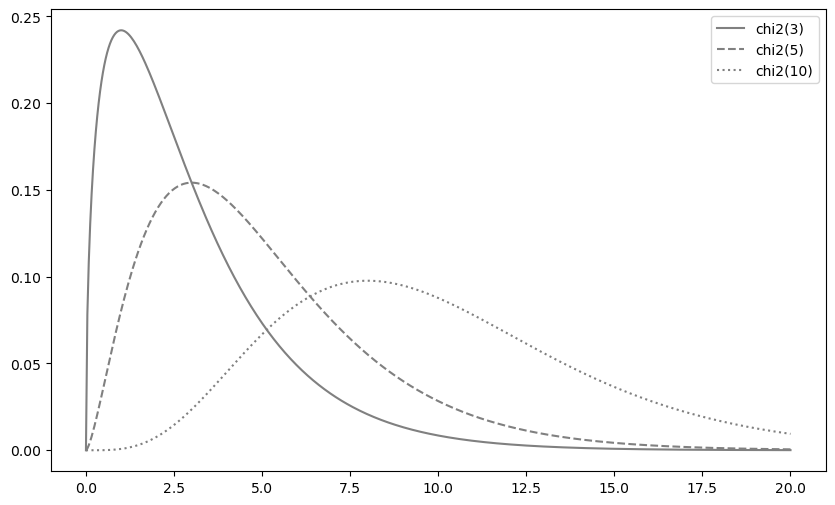

In [23]:
# Chagne degree of freedom 3, 5, 10 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

- 좌우 비대칭으로, 왼쪽으로 치우치고, 오른쪽으로 넓어진다
- 자유도가 커지면 좌우대칭에 가까워진다
- 자유도의 값 가까이에 분포의 정점이 있다

In [24]:
# freedom n's chi squre distribution upper 100a% : x2a(n)
rv = stats.chi2(5)
rv.isf(0.05)

11.070

## 8.4 T distribution
- 정규분포에서 모평균의 구간추정 등에 사용하는 확률 분포
- 서로 독립인 표준정규분포와 카이제곱분포에 의해 정의한다

In [25]:
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)

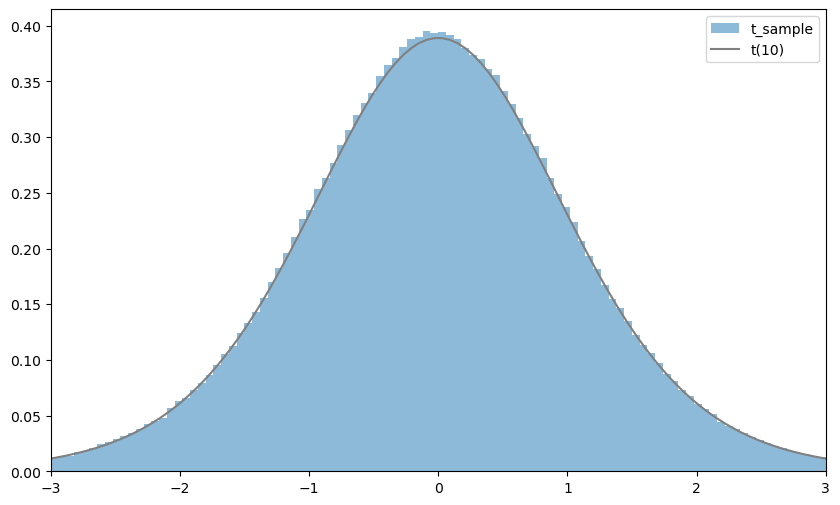

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

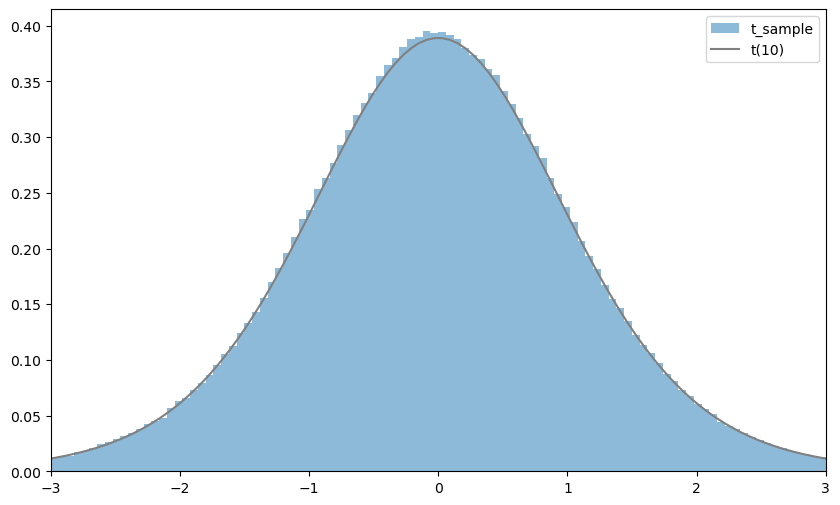

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n) # T function - followed t distribution
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

📌 t분포가 필요한 이유

- 현실에서는 **모집단의 분산(σ²)**을 모르는 경우가 대부분이에요.
- 그래서 표본으로부터 분산을 추정해야 하는데, 이때 추정치 때문에 불확실성이 더 커짐.
- 정규분포 대신 이 불확실성을 반영해주는 분포가 바로 t분포예요.

📌 사용되는 대표적인 경우

- 작은 표본일 때 평균 추론
모집단 분산을 모르는 상황에서 표본 평균의 신뢰구간 계산.
예: “학생 10명의 키 평균으로 전체 학생 키의 평균을 추정할 때”.

- t-검정 (t-test)
한 집단 평균이 특정 값과 다른지 검정 (one-sample t-test)
두 집단 평균 차이가 유의한지 검정 (independent t-test, paired t-test)

- 회귀분석
회귀계수(기울기, 절편 등)가 유의미한지 검정할 때도 t분포 사용.

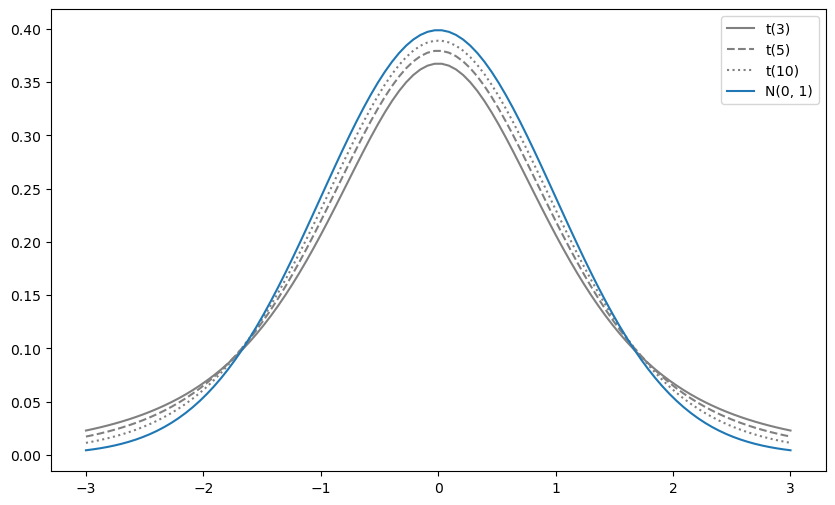

In [28]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

- 좌우대칭인 분포
- 표준정규분포보다 양쪽 끝이 두꺼움
- 자유도가 커지면 표준정규분포에 가까워짐

In [29]:
rv = stats.t(5)
rv.isf(0.05)

2.015

# 8.5 F distribution

- 분산분석 등에서 사용되는 확률분포이다
- 서로 독립인 두개의 카이제곱분포에 의해 다음과 같이 정의됨

In [30]:
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

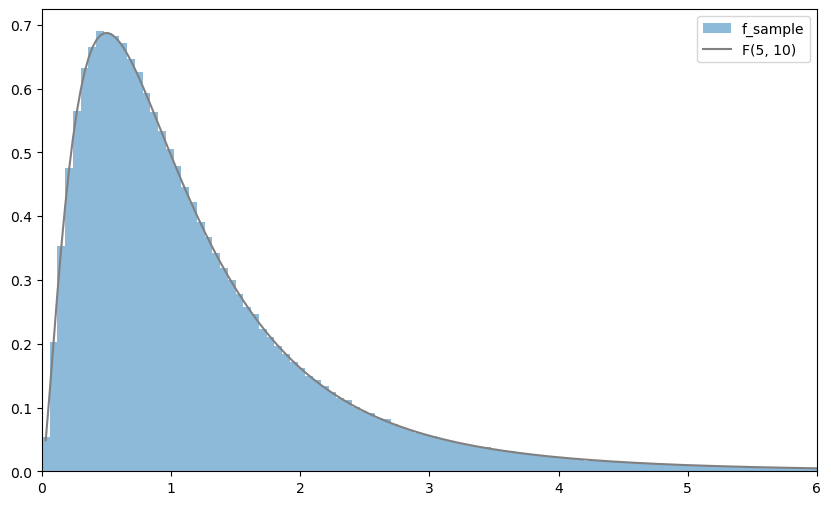

In [31]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2) # The degree of freedom
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

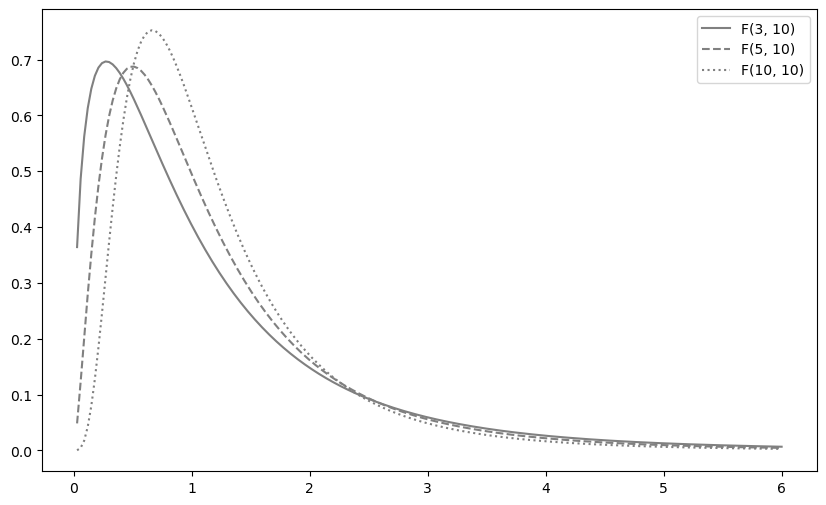

In [32]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()

- 좌우 비대칭으로 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포이다
- 분포의 정점은 1에 가깝다